# 1 Data Cleaning

## Content 
01 Import libraries  
02 Import data  
03 Understanding data  
04 Cleaning data

# 01 Import libraries

In [4]:
import pandas as pd
import numpy as np 
import os

# 02 Import data

In [6]:
path=r'/Users/DA77/CF/Open_Data_Project/02_Data'

In [8]:
insurance=pd.read_csv(os.path.join(path, '2.01_Original_Data', 'insurance.csv'))

# 03 Understanding data

In [68]:
insurance.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# 04 Cleaning data

In [54]:
# Missing data - no missing values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [58]:
# Duplicates - no duplicates 
insurance_dups=insurance[insurance.duplicated()]

In [64]:
# Check for mixed type data - overview
for col in insurance.columns.tolist():
  weird = (insurance[[col]].map(type) != insurance[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (insurance[weird]) > 0:
    print (col)

In [66]:
# Check for mixed type data - correct data types
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [76]:
# Check consistency of all (=object) columns (=sex,smoker, region) - all categorical values are consistent
for col in insurance.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}:")
    print(insurance[col].unique(), "\n") 

Unique values in sex:
['female' 'male'] 

Unique values in smoker:
['yes' 'no'] 

Unique values in region:
['southwest' 'southeast' 'northwest' 'northeast'] 



In [24]:
# Check for data consistency - numerical variables 
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [82]:
# Make sure no numerical values are negative as it would not make sense here - no negative values found
for col in insurance.select_dtypes(include=['number']).columns:  # Checks both int and float
    negative_values = insurance[insurance[col] < 0]  # Filter rows with negative values
    if not negative_values.empty: # Avoid printing empty results when no negative value is found means 'if df is not empty, then print'
        print(f"Negative values found in {col}:")
        print(negative_values[[col]], "\n")  # Display the problematic values

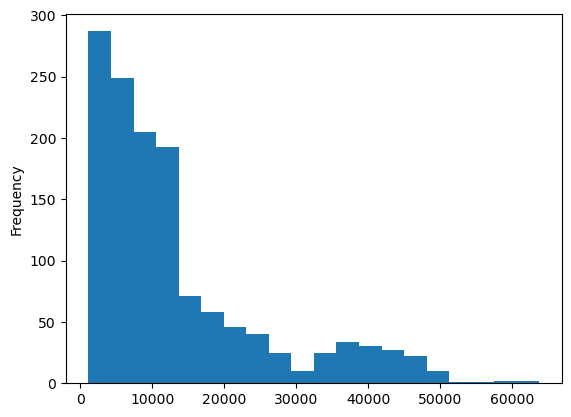

In [84]:
# Charges seam sligthly skewed, since mean>median. 
hist_charges=insurance['charges'].plot.hist(bins =20)

In [12]:
# Export clean data 
insurance.to_csv(os.path.join(path, '2.02_Prepared_Data', 'insurance_clean.csv'))